# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["timezone"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meulaboh
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | padang
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | beamsville
Processing Record 14 of Set 1 | aswan
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | hofn
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | takaka
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | cape town
Proc

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,meulaboh,4.1363,96.1285,297.03,88,97,1.61,ID,25200
1,lebu,-37.6167,-73.6500,291.47,81,54,3.99,CL,-10800
2,carnarvon,-24.8667,113.6333,298.84,71,1,1.96,AU,28800
3,kavaratti,10.5669,72.6420,300.49,67,81,2.41,IN,19800
4,lata,40.1629,-8.3327,279.86,72,0,1.71,PT,0


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meulaboh,4.1363,96.1285,297.03,88,97,1.61,ID,25200
1,lebu,-37.6167,-73.6500,291.47,81,54,3.99,CL,-10800
2,carnarvon,-24.8667,113.6333,298.84,71,1,1.96,AU,28800
3,kavaratti,10.5669,72.6420,300.49,67,81,2.41,IN,19800
4,lata,40.1629,-8.3327,279.86,72,0,1.71,PT,0


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

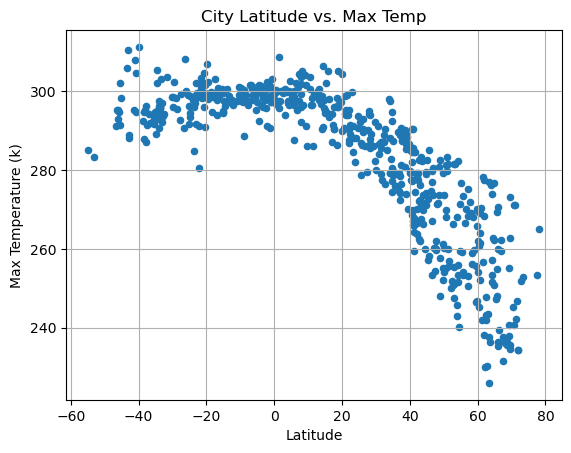

In [17]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (k)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

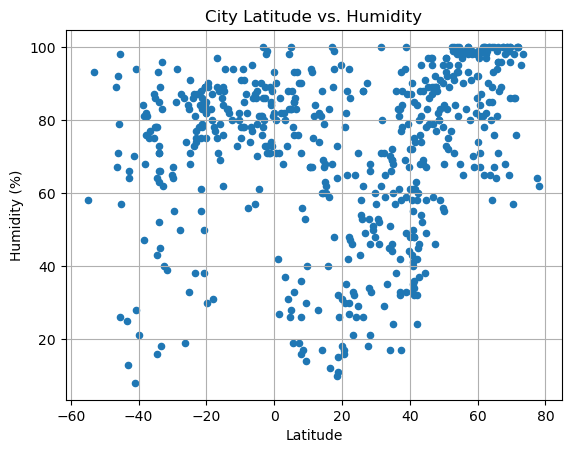

In [18]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

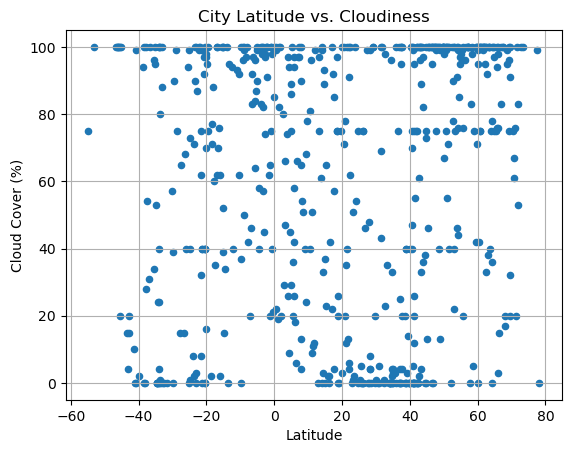

In [19]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

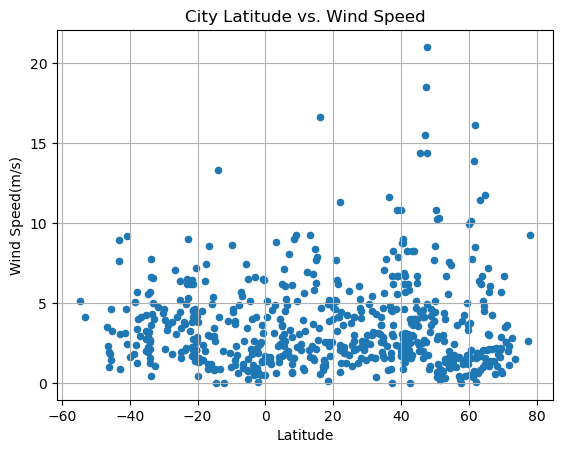

In [20]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots

def linreg(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()),fontsize=10,color="red")

    print(f"The r-squared is: {rvalue**2}")

In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meulaboh,4.1363,96.1285,297.03,88,97,1.61,ID,25200
3,kavaratti,10.5669,72.6420,300.49,67,81,2.41,IN,19800
4,lata,40.1629,-8.3327,279.86,72,0,1.71,PT,0
7,westport,41.1415,-73.3579,267.64,32,0,3.13,US,-18000
8,tuktoyaktuk,69.4541,-133.0374,234.57,100,32,0.77,CA,-25200


In [126]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,291.47,81,54,3.99,CL,-10800
2,carnarvon,-24.8667,113.6333,298.84,71,1,1.96,AU,28800
5,padang,-0.9492,100.3543,297.18,85,100,1.39,ID,25200
6,ushuaia,-54.8000,-68.3000,284.96,58,75,5.14,AR,-10800
11,port alfred,-33.5906,26.8910,296.03,89,100,0.45,ZA,7200


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7432006556608677


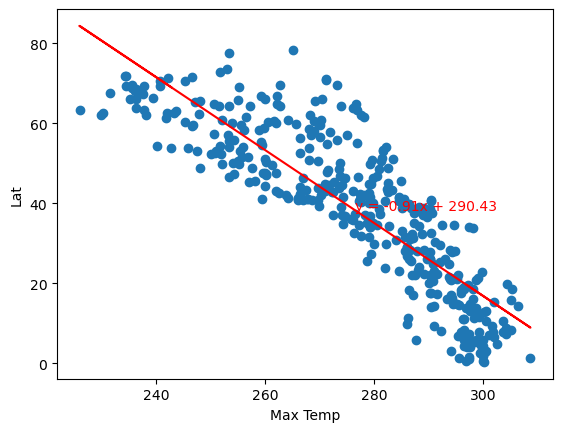

In [127]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"])

The r-squared is: 0.07933151293123505


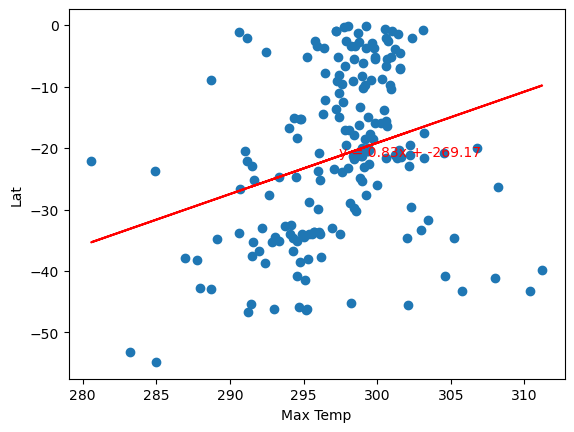

In [128]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There is a very strong correlation in the Northern Hemisphere of temperature vs. latitude. The closer you are to the equator, the warmer the average temperature in Kelvins. However, the correlation is very weak for the Southern Hemisphere. For the most part the Southern Hemisphere does not follow a trend of being warmer as the equator is approached- instead, the data looks to be mostly clustered between 290-305 kelvins (about 17-32 deg C). This is likely a function of the time of year this data was taken, because right now in the Southern Hemisphere it's considered the summer months where most cities are either always temperate (cities near the equator) and even the farther latitudes are much warmer than they would be during the winter.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.19295543277786717


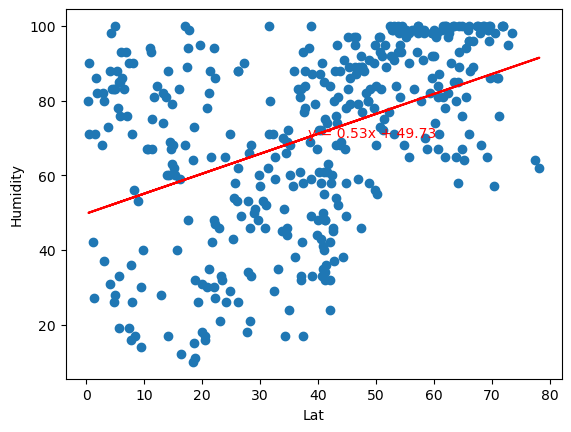

In [135]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-squared is: 0.12478706601006415


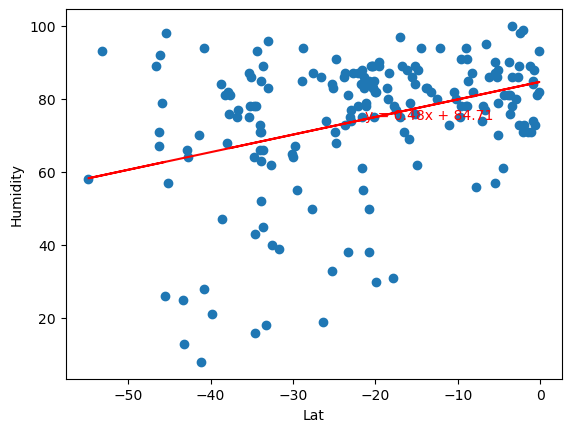

In [136]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Humidity shows a generally weak correlation, but interestingly in the Northern Hemisphere the correlation shows that humidity levels tends to increase as you get farther than from equator, whereas for the Southern Hemisphere the humidity is a bit higher as you get closer to the equator. The correlation is fairly weak but if it needs to be explained, certain things to be explored would be whether the winter months in the Northern Hemisphere also means more general precipitation in those cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06378071961077604


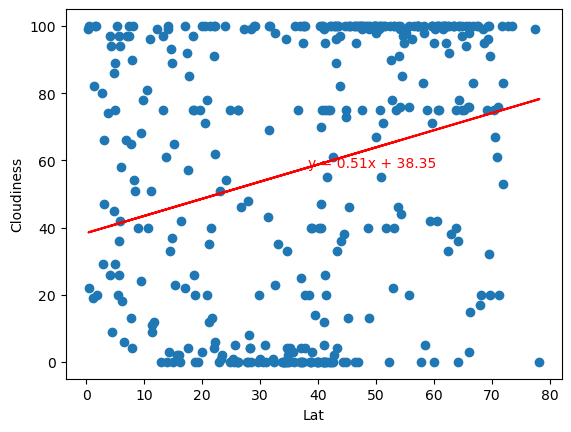

In [137]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-squared is: 0.06583752576762868


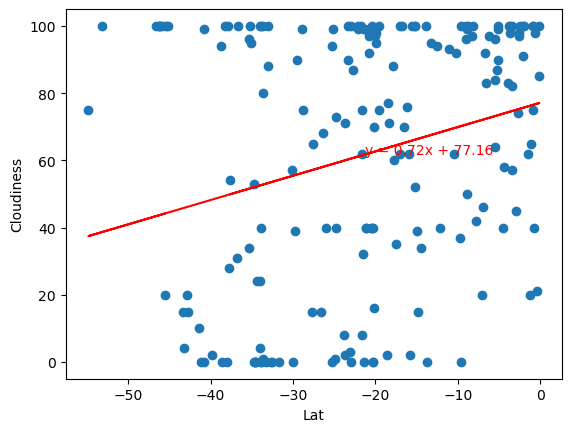

In [138]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There is an incredibly weak correlation between cloud cover vs. lattitude. Values are all over the place and the r-squared value is very low, so no conclusions can really be drawn from this data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00010204229902241312


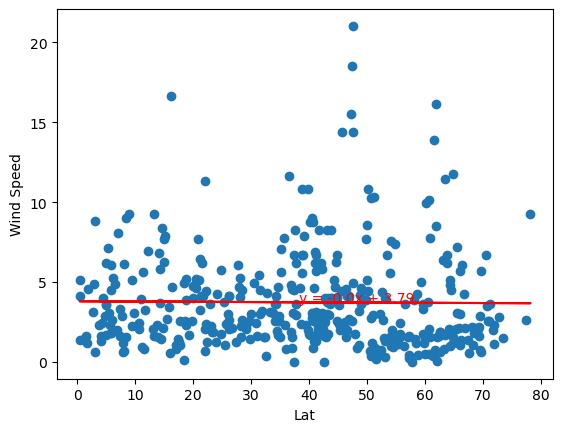

In [139]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-squared is: 0.02720675259757948


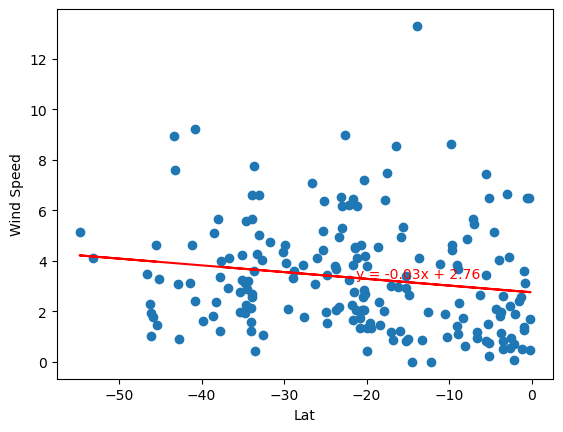

In [140]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is an incredibly weak correlation between wind speed vs. lattitude. Values are all over the place and the r-squared value is very low, so no conclusions can really be drawn from this data.